### Name: Jiten Sidhpura 
### UID: 2018130051
### Batch B
### BE COMPS

### Objective: To carry out logistic regression and build a classification model using Python Platform

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## Reading Data

In [2]:
filename = 'horse.csv'

dataset = pd.read_csv(filename)

dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
dataset.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

## Drop Duplicates If Present

In [4]:
dataset = dataset.drop_duplicates()

In [5]:
dataset.skew()

C:\Users\jiten\AppData\Local\Temp/ipykernel_18320/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


hospital_number           2.394354
rectal_temp               0.030647
pulse                     1.018127
respiratory_rate          1.636583
nasogastric_reflux_ph    -0.354427
packed_cell_volume        0.695830
total_protein             1.009973
abdomo_protein            1.404909
lesion_1                  4.337764
lesion_2                  8.299111
lesion_3                 17.291616
dtype: float64

<AxesSubplot:>

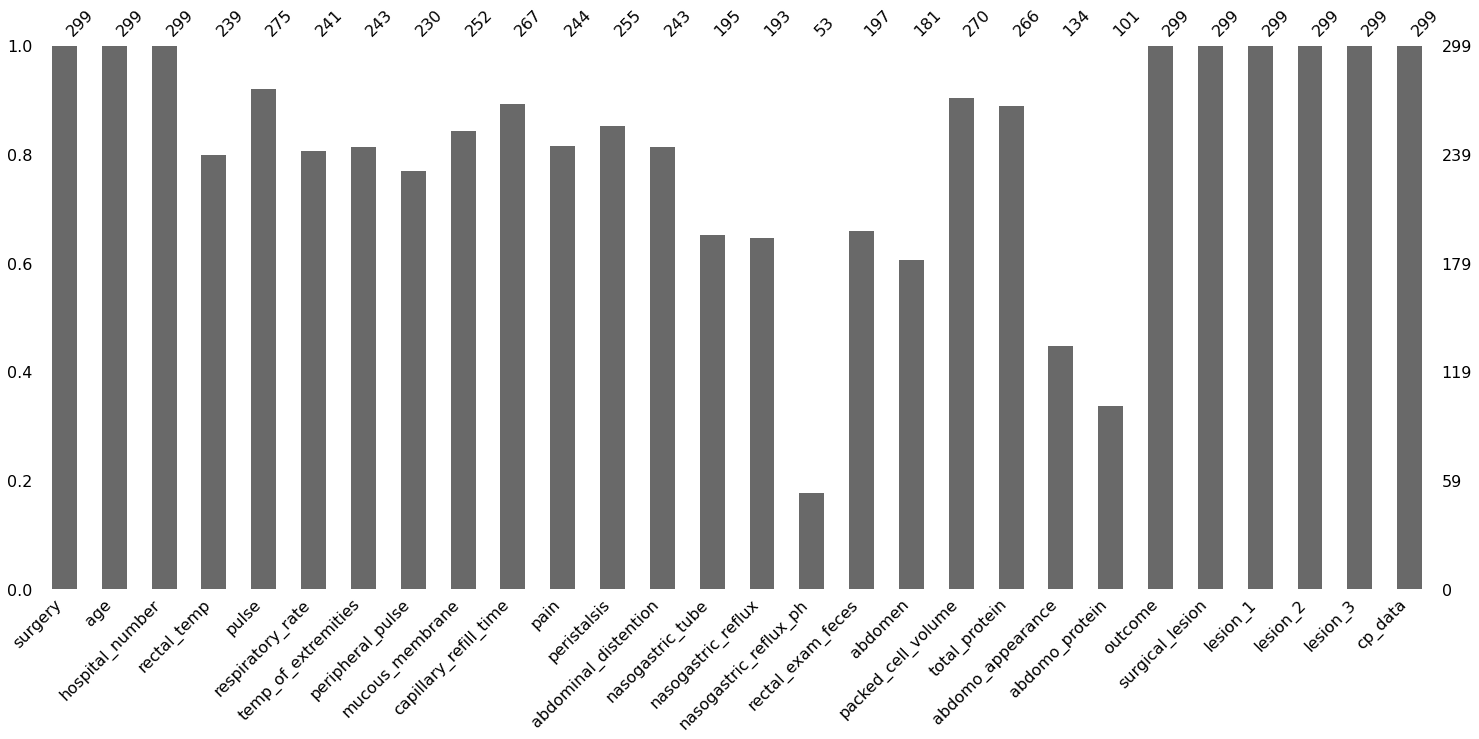

In [6]:
import missingno
missingno.bar(dataset)

In [7]:
from scipy.special import boxcox, inv_boxcox

def modify_boxcox_value(col_name, x):
    print(dataset[col_name].skew())
    sns.distplot(dataset[col_name])
    plt.show()
    
    transformed_value = boxcox(dataset[col_name], x)
    print(transformed_value.skew())
    sns.distplot(transformed_value)
    plt.show()

## Outcome Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outcome', ylabel='count'>

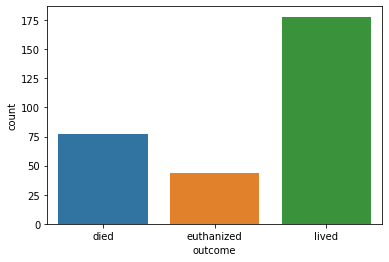

In [8]:
sns.countplot(dataset['outcome'])

## Converting Categorical Data to Numerical

In [9]:
dataset['outcome'] = dataset['outcome'].map({
    'died': 0,
    'euthanized': 1,
    'lived': 2,
})

In [10]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,0,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,1,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,2,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,0,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,0,no,4300,0,0,no


## Surgery Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surgery', ylabel='count'>

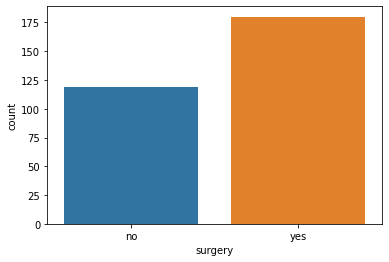

In [11]:
sns.countplot(dataset['surgery'])

In [12]:
dataset['surgery'].value_counts()

yes    180
no     119
Name: surgery, dtype: int64

In [13]:
dataset[dataset['surgery'] == 'no']['outcome'].value_counts()

2    83
0    19
1    17
Name: outcome, dtype: int64

In [14]:
dataset[dataset['surgery'] == 'yes']['outcome'].value_counts()

2    95
0    58
1    27
Name: outcome, dtype: int64

## If surgery is performed then chances of euthanized rises significantly

## Convert surgery Feature to  Numerical

In [15]:
yes_no_dict = {
    'no': 0,
    'yes': 1
}

dataset['surgery'] = dataset['surgery'].map(yes_no_dict)

In [16]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,0,no,11300,0,0,no
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,1,no,2208,0,0,no
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,2,no,0,0,0,yes
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,0,yes,2208,0,0,yes
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,0,no,4300,0,0,no


## Age Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

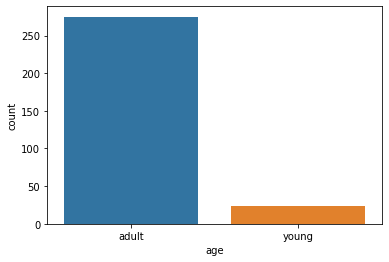

In [17]:
sns.countplot(dataset['age'])

In [18]:
dataset[dataset['age'] == 'adult']['outcome'].value_counts()

2    166
0     66
1     43
Name: outcome, dtype: int64

In [19]:
dataset[dataset['age'] == 'young']['outcome'].value_counts()

2    12
0    11
1     1
Name: outcome, dtype: int64

In [20]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,0,no,11300,0,0,no
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,1,no,2208,0,0,no
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,2,no,0,0,0,yes
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,0,yes,2208,0,0,yes
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,0,no,4300,0,0,no


## hospital_number Feature

## hospital_number is case id given to horse 

## we can see some horses are treated in hospital multiple times

In [21]:
treatment_frequencies = dict(dataset['hospital_number'].value_counts())

In [22]:
dataset['TreatedMultipleTimes'] = dataset['hospital_number'].apply(lambda x: treatment_frequencies[x])

In [23]:
dataset['TreatedMultipleTimes'].unique()

array([1, 2], dtype=int64)

In [24]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,8.4,NaN,NaN,0,no,11300,0,0,no,1
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,85.0,cloudy,2.0,1,no,2208,0,0,no,1
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,6.7,NaN,NaN,2,no,0,0,0,yes,1
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,7.2,serosanguious,5.3,0,yes,2208,0,0,yes,1
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,7.4,NaN,NaN,0,no,4300,0,0,no,1


## Fetch the Dataframe when horses are treated are twice

In [25]:
multiple_times_horse = dataset[dataset['TreatedMultipleTimes'] == 2]
multiple_times_horse

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
26,1,adult,530526,38.3,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,7.0,cloudy,3.9,2,yes,3111,0,0,yes,2
34,1,adult,529796,NaN,100.0,30.0,cool,reduced,pale_cyanotic,more_3_sec,...,6.6,NaN,NaN,2,yes,1124,0,0,no,2
38,0,adult,528996,38.6,52.0,NaN,normal,normal,normal_pink,less_3_sec,...,6.6,clear,5.0,2,no,0,0,0,yes,2
48,1,adult,528890,38.9,80.0,44.0,cool,reduced,pale_pink,more_3_sec,...,6.5,serosanguious,NaN,0,yes,7111,0,0,no,2
54,0,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,...,8.1,serosanguious,4.5,1,yes,7400,0,0,yes,2
59,0,adult,528904,NaN,96.0,NaN,cool,reduced,pale_pink,more_3_sec,...,NaN,NaN,NaN,0,yes,4205,0,0,no,2
67,0,adult,528931,38.4,54.0,24.0,normal,normal,normal_pink,less_3_sec,...,7.2,clear,NaN,2,no,3111,0,0,yes,2
71,1,adult,529424,37.8,48.0,28.0,normal,normal,normal_pink,less_3_sec,...,5.9,cloudy,7.0,2,no,0,0,0,yes,2
73,1,adult,528469,38.1,52.0,24.0,normal,normal,bright_red,less_3_sec,...,7.5,cloudy,2.6,0,yes,2112,0,0,yes,2
78,1,adult,530693,NaN,NaN,NaN,cool,reduced,pale_pink,3,...,5.9,NaN,NaN,0,yes,3025,0,0,no,2


## 16 Unique Horses 

In [26]:
multiple_times_horse['hospital_number'].unique()

array([ 530526,  529796,  528996,  528890,  529461,  528904,  528931,
        529424,  528469,  530693, 5279822,  528729,  527544,  532349,
        527916,  528151], dtype=int64)

In [27]:
horse_hospital_id = 528996

multiple_times_horse[multiple_times_horse['hospital_number'] == horse_hospital_id]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
38,0,adult,528996,38.6,52.0,NaN,normal,normal,normal_pink,less_3_sec,...,6.6,clear,5.0,2,no,0,0,0,yes,2
155,0,adult,528996,38.6,52.0,20.0,normal,normal,normal_pink,less_3_sec,...,6.6,clear,5.0,2,no,0,0,0,yes,2


In [28]:
for col in dataset.columns:
    print(dataset[(dataset['TreatedMultipleTimes'] == 2) & (dataset['hospital_number'] == horse_hospital_id)][col])

38     0
155    0
Name: surgery, dtype: int64
38     adult
155    adult
Name: age, dtype: object
38     528996
155    528996
Name: hospital_number, dtype: int64
38     38.6
155    38.6
Name: rectal_temp, dtype: float64
38     52.0
155    52.0
Name: pulse, dtype: float64
38      NaN
155    20.0
Name: respiratory_rate, dtype: float64
38     normal
155    normal
Name: temp_of_extremities, dtype: object
38     normal
155    normal
Name: peripheral_pulse, dtype: object
38     normal_pink
155    normal_pink
Name: mucous_membrane, dtype: object
38     less_3_sec
155    less_3_sec
Name: capillary_refill_time, dtype: object
38     mild_pain
155    mild_pain
Name: pain, dtype: object
38     hypomotile
155    hypomotile
Name: peristalsis, dtype: object
38     slight
155    slight
Name: abdominal_distention, dtype: object
38     none
155    none
Name: nasogastric_tube, dtype: object
38     none
155    none
Name: nasogastric_reflux, dtype: object
38    NaN
155   NaN
Name: nasogastric_reflux_ph, dty

In [29]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,8.4,NaN,NaN,0,no,11300,0,0,no,1
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,85.0,cloudy,2.0,1,no,2208,0,0,no,1
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,6.7,NaN,NaN,2,no,0,0,0,yes,1
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,7.2,serosanguious,5.3,0,yes,2208,0,0,yes,1
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,7.4,NaN,NaN,0,no,4300,0,0,no,1


In [30]:
dataset.skew()

C:\Users\jiten\AppData\Local\Temp/ipykernel_18320/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


surgery                  -0.418897
hospital_number           2.394354
rectal_temp               0.030647
pulse                     1.018127
respiratory_rate          1.636583
nasogastric_reflux_ph    -0.354427
packed_cell_volume        0.695830
total_protein             1.009973
abdomo_protein            1.404909
outcome                  -0.711307
lesion_1                  4.337764
lesion_2                  8.299111
lesion_3                 17.291616
TreatedMultipleTimes      2.555198
dtype: float64

## rectal_temp Feature 

In [31]:
dataset['rectal_temp'].isna().sum()

60

## Median Encoding Data

In [32]:
dataset['rectal_temp'].fillna(dataset['rectal_temp'].median(), inplace=True)

In [33]:
dataset['rectal_temp'].median()

38.2

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.0052392960552133105


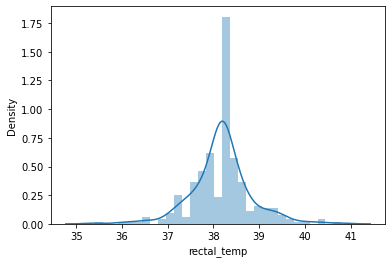

0.005239296055206409


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


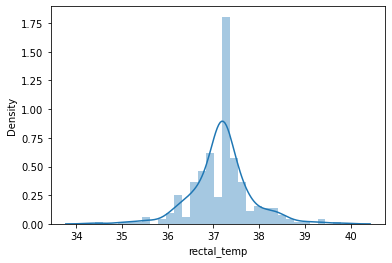

In [34]:
modify_boxcox_value('rectal_temp', 1)

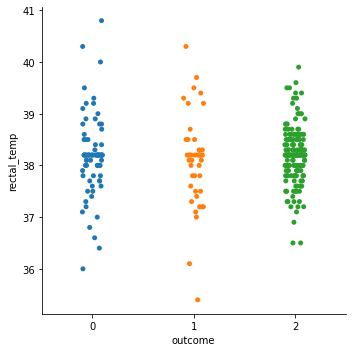

In [35]:
sns.catplot(y="rectal_temp", x="outcome", data=dataset)

## Rectal Temp distribution is  near about the same for all 3 classes of the target var

In [36]:
for outcome_value in dataset['outcome'].unique():
    print(dataset[dataset['outcome'] == outcome_value]['rectal_temp'].median())

38.2
38.2
38.2


In [37]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,8.4,NaN,NaN,0,no,11300,0,0,no,1
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,85.0,cloudy,2.0,1,no,2208,0,0,no,1
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,6.7,NaN,NaN,2,no,0,0,0,yes,1
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,7.2,serosanguious,5.3,0,yes,2208,0,0,yes,1
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,7.4,NaN,NaN,0,no,4300,0,0,no,1


## pulse

In [38]:
dataset['pulse'].isna().sum()

24

## Median Encoding Data

In [39]:
dataset['pulse'].fillna(dataset['pulse'].median(), inplace=True)

1.1196454292428284


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


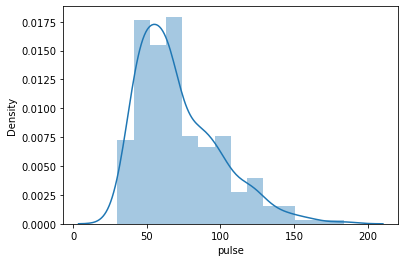

0.0722177515569591


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


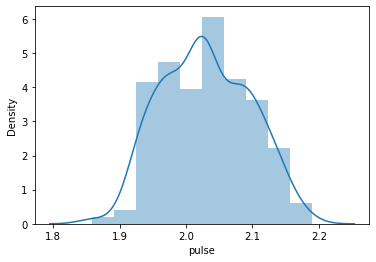

In [40]:
modify_boxcox_value('pulse', -0.4)

## Apply BoxCox Transformation

In [41]:
dataset['transformed_pulse'] = boxcox(dataset['pulse'], -0.4)

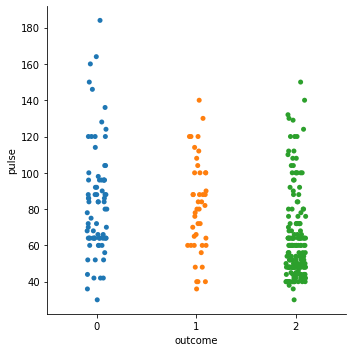

In [42]:
sns.catplot(y="pulse", x="outcome", data=dataset)

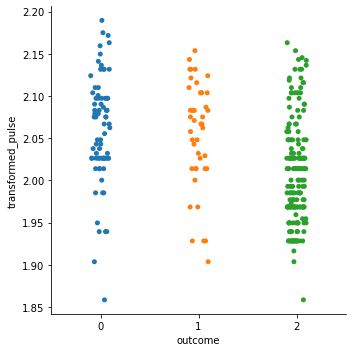

In [43]:
sns.catplot(y="transformed_pulse", x="outcome", data=dataset)

In [44]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===> ', dataset[dataset['outcome'] == outcome_value]['pulse'].median())

0 ===>  80.0
1 ===>  81.0
2 ===>  56.0


In [45]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===> ', dataset[dataset['outcome'] == outcome_value]['transformed_pulse'].median())

0 ===>  2.0667844730280334
1 ===>  2.068913386667881
2 ===>  2.000351258489637


## After Feature Scaling, median of all 3 classes is close whereas before it was very large

In [46]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,NaN,0,no,11300,0,0,no,1,2.032133
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,cloudy,2.0,1,no,2208,0,0,no,1,2.082990
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,NaN,2,no,0,0,0,yes,1,1.928369
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,serosanguious,5.3,0,yes,2208,0,0,yes,1,2.174911
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,0,no,4300,0,0,no,1,2.109944


## respiratory_rate

In [47]:
dataset['respiratory_rate'].isna().sum()

58

In [48]:
dataset['respiratory_rate'].fillna(dataset['respiratory_rate'].median(), inplace=True)

1.9634619692119912


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


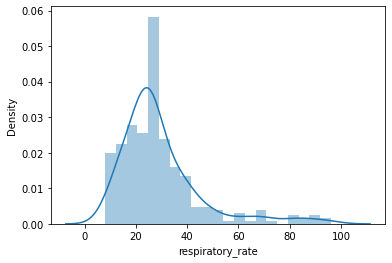

0.04286958937936981


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


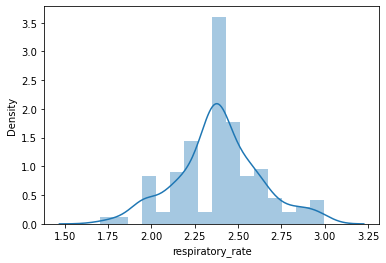

In [49]:
modify_boxcox_value('respiratory_rate', -0.2)

## Apply BoxCox Transformation

In [50]:
dataset['transformed_respiratory_rate'] = boxcox(dataset['respiratory_rate'], -0.2)

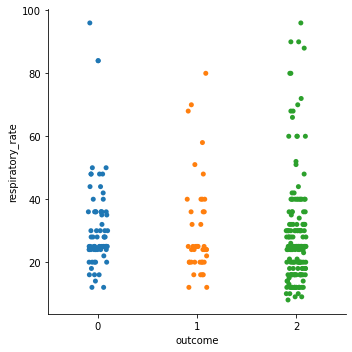

In [51]:
sns.catplot(y="respiratory_rate", x="outcome", data=dataset)

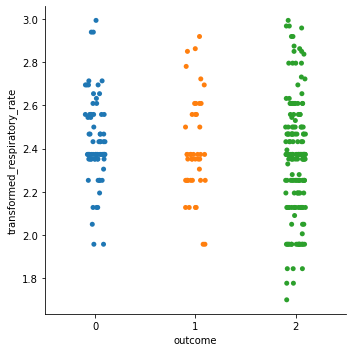

In [52]:
sns.catplot(y="transformed_respiratory_rate", x="outcome", data=dataset)

In [53]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===> ', dataset[dataset['outcome'] == outcome_value]['respiratory_rate'].median())

0 ===>  25.0
1 ===>  25.0
2 ===>  25.0


In [54]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===> ', dataset[dataset['outcome'] == outcome_value]['transformed_respiratory_rate'].median())

0 ===>  2.3734721955962326
1 ===>  2.3734721955962326
2 ===>  2.3734721955962326


In [55]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


## temp_of_extremities

In [56]:
dataset['temp_of_extremities'].isna().sum()

56

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp_of_extremities', ylabel='count'>

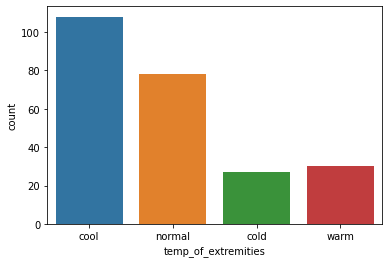

In [57]:
sns.countplot(dataset['temp_of_extremities'])

## Imputing with the most frequent value 

In [58]:
dataset['temp_of_extremities'].value_counts().index[0]

'cool'

In [59]:
dataset['temp_of_extremities'].fillna(dataset['temp_of_extremities'].value_counts().index[0], inplace=True)

<AxesSubplot:xlabel='temp_of_extremities', ylabel='outcome'>

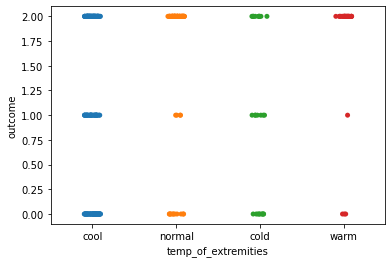

In [60]:
sns.stripplot(x='temp_of_extremities', y='outcome', data=dataset)

## Warm belongs to majorly class 2 
## Cold Normal and Cool are more and less distributed equally

## peripheral_pulse

In [61]:
dataset['peripheral_pulse'].isna().sum()

69

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='peripheral_pulse', ylabel='count'>

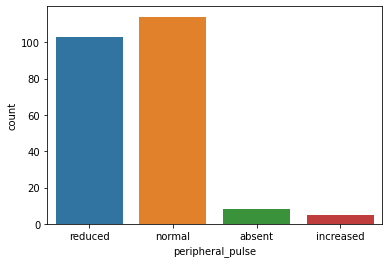

In [62]:
sns.countplot(dataset['peripheral_pulse'])

## Imputing Missing Data with Most Frequent

In [63]:
dataset['peripheral_pulse'].value_counts().index

Index(['normal', 'reduced', 'absent', 'increased'], dtype='object')

In [64]:
dataset['peripheral_pulse'].fillna(dataset['peripheral_pulse'].value_counts().index[0], inplace=True)

<AxesSubplot:xlabel='peripheral_pulse', ylabel='outcome'>

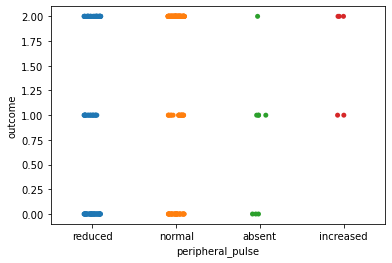

In [65]:
sns.stripplot(x='peripheral_pulse', y='outcome', data=dataset)

# Increased peripheral pulse not present when class 0
## Reduced, normal have equal distribution across all classes 
## For absent, outcome is majorly class 0 and class 1

In [66]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


## mucous_membrane

In [67]:
dataset['mucous_membrane'].isna().sum()

47

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mucous_membrane', ylabel='count'>

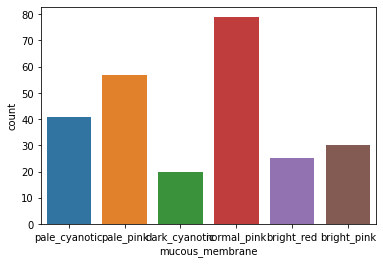

In [68]:
sns.countplot(dataset['mucous_membrane'])

In [69]:
dataset['mucous_membrane'].value_counts().index

Index(['normal_pink', 'pale_pink', 'pale_cyanotic', 'bright_pink',
       'bright_red', 'dark_cyanotic'],
      dtype='object')

## Imputing Missing Data with Most Frequent Data

In [70]:
dataset['mucous_membrane'].fillna(dataset['mucous_membrane'].value_counts().index[0], inplace=True)

<AxesSubplot:xlabel='mucous_membrane', ylabel='outcome'>

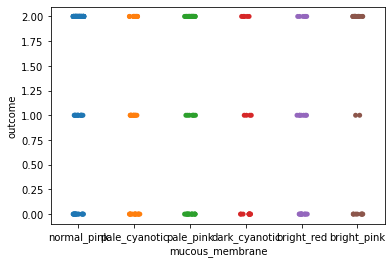

In [71]:
sns.stripplot(x='mucous_membrane', y='outcome', data=dataset)

## All classes of output and mucous membrane have equal distribution

In [72]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


## capillary_refill_time

In [73]:
dataset['capillary_refill_time'].isna().sum()

32

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capillary_refill_time', ylabel='count'>

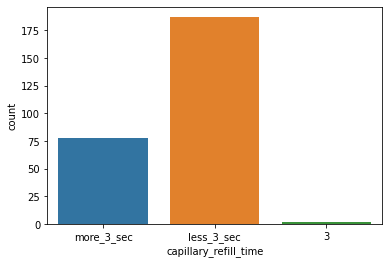

In [74]:
sns.countplot(dataset['capillary_refill_time'])

## Only 2 samples in the dataset with capillary_refill_time == 3 so dropping it 

In [75]:
dataset[dataset['capillary_refill_time'] == '3']['outcome']

78    0
85    2
Name: outcome, dtype: int64

In [76]:
dataset = dataset[dataset['capillary_refill_time'] != '3']

dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


## Imputing Missing Data with Most Frequent Data 

In [77]:
dataset['capillary_refill_time'].fillna(dataset['capillary_refill_time'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='capillary_refill_time', ylabel='outcome'>

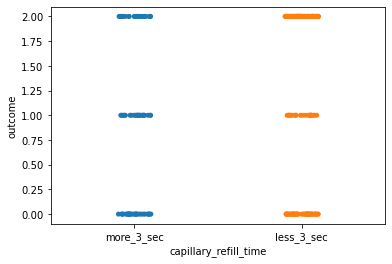

In [78]:
sns.stripplot(x='capillary_refill_time', y='outcome', data=dataset)

## distribution is same for capillary_refill_time with the outcome col

In [79]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


In [80]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## pain

In [81]:
dataset['pain'].isna().sum()

55

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pain', ylabel='count'>

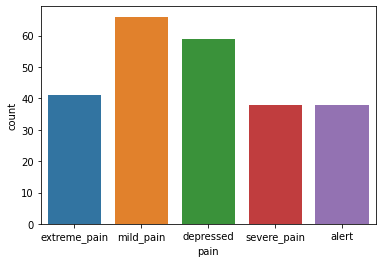

In [82]:
sns.countplot(dataset['pain'])

## Imputing Missing Data with Most Frequent 

In [83]:
dataset['pain'].fillna(dataset['pain'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='pain', ylabel='outcome'>

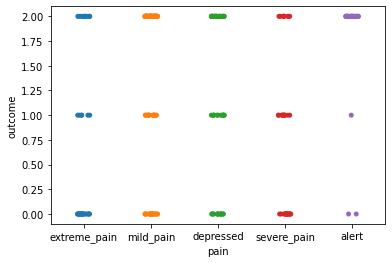

In [84]:
sns.stripplot(x='pain', y='outcome', data=dataset)

## Alert class majorly favours outcome 2

## peristalsis

In [85]:
dataset['peristalsis'].isna().sum()

44

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='peristalsis', ylabel='count'>

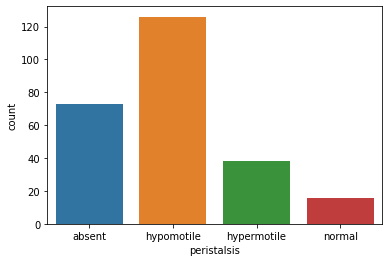

In [86]:
sns.countplot(dataset['peristalsis'])

## Imputing Missing Data with Most Frequent 

In [87]:
dataset['peristalsis'].fillna(dataset['peristalsis'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='peristalsis', ylabel='outcome'>

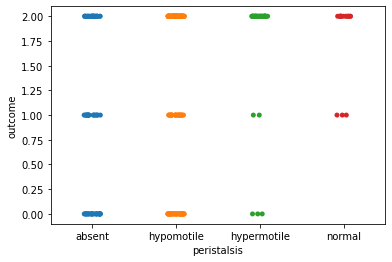

In [88]:
sns.stripplot(x='peristalsis', y='outcome', data=dataset)

## Normal & hypermotile prefers outcome 2 majorly
## absent & hypomotile are equal for all 3 outcome classes

In [89]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## abdominal_distention

In [90]:
dataset['abdominal_distention'].isna().sum()

56

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='abdominal_distention', ylabel='count'>

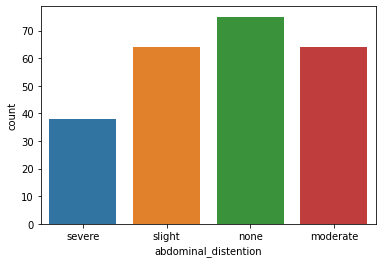

In [91]:
sns.countplot(dataset['abdominal_distention'])

## Imputing Missing Data with Most Frequent 

In [92]:
dataset['abdominal_distention'].fillna(dataset['abdominal_distention'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='abdominal_distention', ylabel='outcome'>

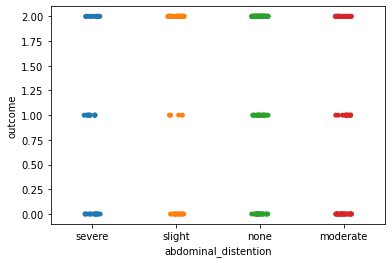

In [93]:
sns.stripplot(x='abdominal_distention', y='outcome', data=dataset)

In [94]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## nasogastric_tube

In [95]:
dataset['nasogastric_tube'].isna().sum()

104

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nasogastric_tube', ylabel='count'>

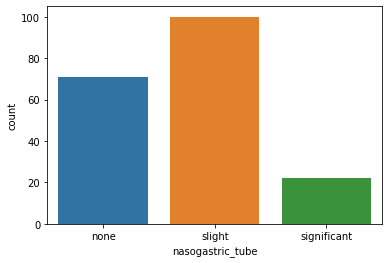

In [96]:
sns.countplot(dataset['nasogastric_tube'])

## Imputing Missing Data with Most Frequent 

In [97]:
dataset['nasogastric_tube'].fillna(dataset['nasogastric_tube'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='nasogastric_tube', ylabel='outcome'>

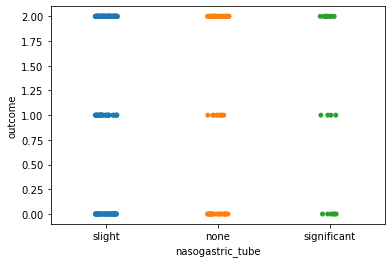

In [98]:
sns.stripplot(x='nasogastric_tube', y='outcome', data=dataset)

## With significant nasogastric tube horse has outcome either 2 or 0 

In [99]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## nasogastric_reflux

In [100]:
dataset['nasogastric_reflux'].isna().sum()

106

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nasogastric_reflux', ylabel='count'>

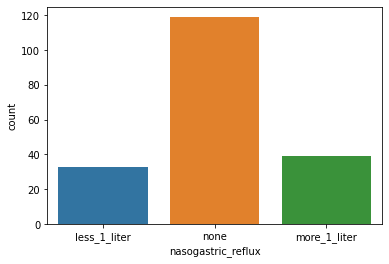

In [101]:
sns.countplot(dataset['nasogastric_reflux'])

## Imputing Missing Data with Most Frequent

In [102]:
dataset['nasogastric_reflux'].fillna(dataset['nasogastric_reflux'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='nasogastric_reflux', ylabel='outcome'>

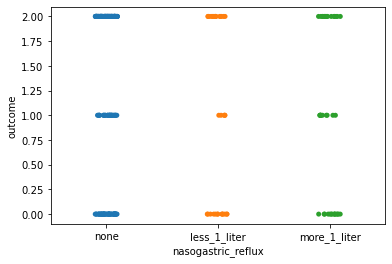

In [103]:
sns.stripplot(x='nasogastric_reflux', y='outcome', data=dataset)

In [104]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## nasogastric_reflux_ph

In [105]:
dataset['nasogastric_reflux_ph'].isna().sum()

244

## To many missing data better to drop it 

In [106]:
del dataset['nasogastric_reflux_ph']

## rectal_exam_feces

In [107]:
dataset['rectal_exam_feces'].isna().sum()

101

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rectal_exam_feces', ylabel='count'>

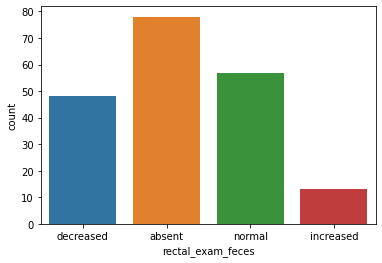

In [108]:
sns.countplot(dataset['rectal_exam_feces'])

## Imputing Missing Data with Most Frequent

In [109]:
dataset['rectal_exam_feces'].fillna(dataset['rectal_exam_feces'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='rectal_exam_feces', ylabel='outcome'>

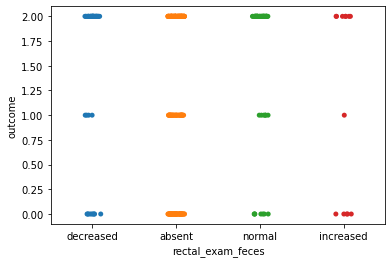

In [110]:
sns.stripplot(x='rectal_exam_feces', y='outcome', data=dataset)

## Normal and Increased value of rectal_exam_feces causes outcome to 2 


In [111]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'TreatedMultipleTimes',
       'transformed_pulse', 'transformed_respiratory_rate'],
      dtype='object')

## abdomen

In [112]:
dataset['abdomen'].isna().sum()

118

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='abdomen', ylabel='count'>

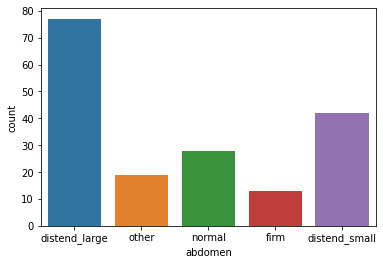

In [113]:
sns.countplot(dataset['abdomen'])

## Imputing Missing Data with Most Frequent 

In [114]:
dataset['abdomen'].fillna(dataset['abdomen'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='abdomen', ylabel='outcome'>

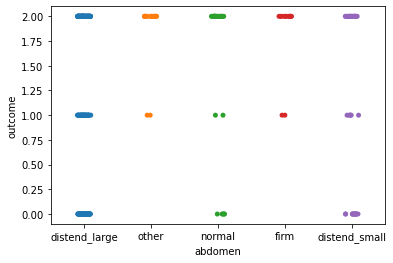

In [115]:
sns.stripplot(x='abdomen', y='outcome', data=dataset)

## Abdomen if firm or other then outcome is not 0

In [116]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'TreatedMultipleTimes',
       'transformed_pulse', 'transformed_respiratory_rate'],
      dtype='object')

## packed_cell_volume

In [117]:
dataset['packed_cell_volume'].isna().sum()

29

## Imputing Missing Data with Median

In [118]:
dataset['packed_cell_volume'].fillna(dataset['packed_cell_volume'].median(), inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.7646683138559134


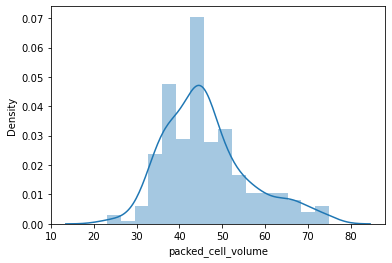

0.048905545383788794


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


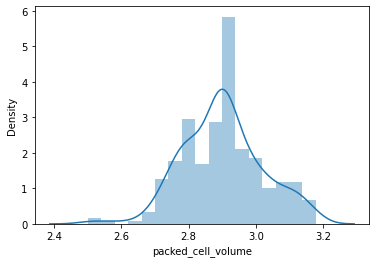

In [119]:
modify_boxcox_value('packed_cell_volume', -0.15)

In [120]:
dataset['packed_cell_volume'] = boxcox(dataset['packed_cell_volume'], -0.15)

C:\Users\jiten\AppData\Local\Temp/ipykernel_18320/2627413445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['packed_cell_volume'] = boxcox(dataset['packed_cell_volume'], -0.15)


<AxesSubplot:xlabel='outcome', ylabel='packed_cell_volume'>

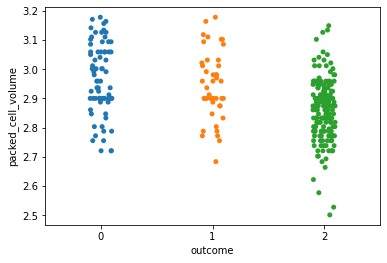

In [121]:
sns.stripplot(y='packed_cell_volume', x='outcome', data=dataset)

In [122]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===>',dataset[dataset['outcome'] == outcome_value]['packed_cell_volume'].median())

0 ===> 2.9593196385136253
1 ===> 2.9246042839747237
2 ===> 2.8744907777241986


In [123]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'TreatedMultipleTimes',
       'transformed_pulse', 'transformed_respiratory_rate'],
      dtype='object')

## total_protein

In [124]:
dataset['total_protein'].isna().sum()

33

## IMputing Missing Data with Median 

In [125]:
dataset['total_protein'].fillna(dataset['total_protein'].median(), inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


1.1801875736315277


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


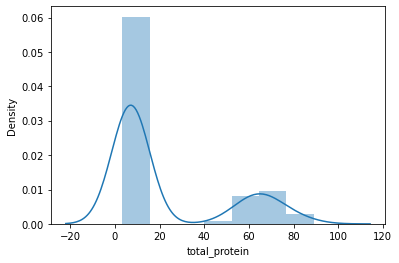

0.002325119779947965


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


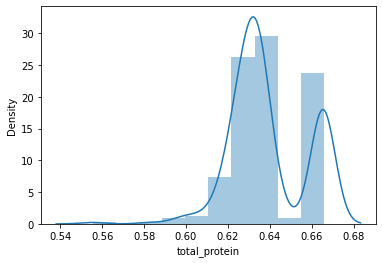

In [126]:
modify_boxcox_value('total_protein', -1.5)

In [127]:
dataset['total_protein'] = boxcox(dataset['total_protein'], -1.5)

C:\Users\jiten\AppData\Local\Temp/ipykernel_18320/2373056772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['total_protein'] = boxcox(dataset['total_protein'], -1.5)


<AxesSubplot:xlabel='outcome', ylabel='total_protein'>

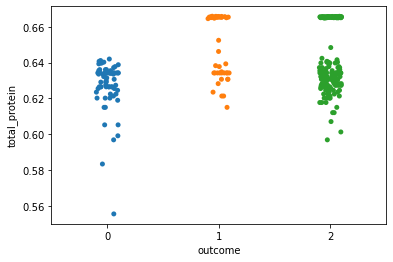

In [128]:
sns.stripplot(y='total_protein', x='outcome', data=dataset)

In [129]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'TreatedMultipleTimes',
       'transformed_pulse', 'transformed_respiratory_rate'],
      dtype='object')

## abdomo_appearance

In [130]:
dataset['abdomo_appearance'].isna().sum()

163

## Data Missing is more than 50%

In [131]:
del dataset['abdomo_appearance']

In [132]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## abdomo_protein

In [133]:
dataset['abdomo_protein'].isna().sum()

196

## Data Missing is more than 50%

In [134]:
del dataset['abdomo_protein']

## surgical_lesion

In [135]:
dataset['surgical_lesion'].isna().sum()

0

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surgical_lesion', ylabel='count'>

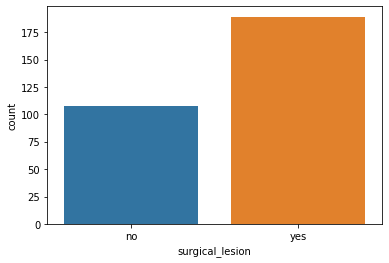

In [136]:
sns.countplot(dataset['surgical_lesion'])

<AxesSubplot:xlabel='outcome', ylabel='surgical_lesion'>

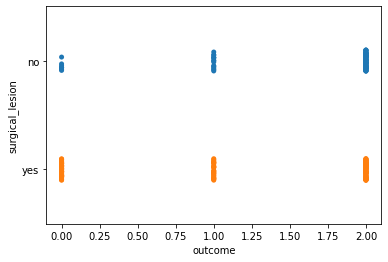

In [137]:
sns.stripplot(y='surgical_lesion', x='outcome', data=dataset)

In [138]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## lesion_1

In [139]:
dataset['lesion_1'].isna().sum()

0

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lesion_1', ylabel='Density'>

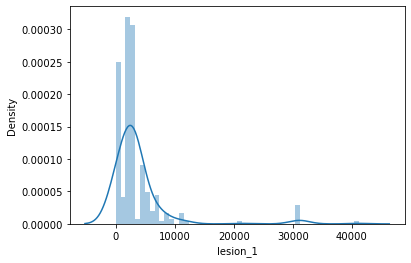

In [140]:
sns.distplot(dataset['lesion_1'])

4.325076805682777


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


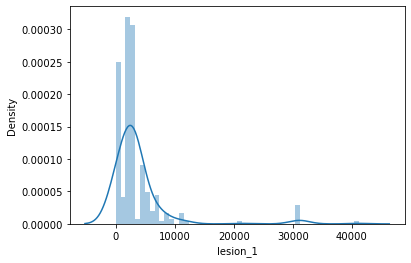

-0.8664563733917758


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


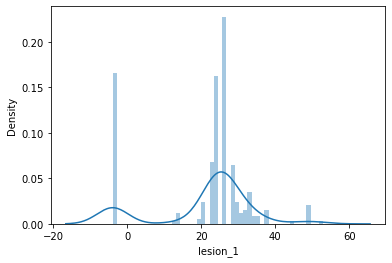

In [141]:
modify_boxcox_value('lesion_1', 0.25)

In [142]:
dataset['lesion_1'] = boxcox(dataset['lesion_1'], 0.25)

C:\Users\jiten\AppData\Local\Temp/ipykernel_18320/688274946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['lesion_1'] = boxcox(dataset['lesion_1'], 0.25)


<AxesSubplot:xlabel='outcome', ylabel='lesion_1'>

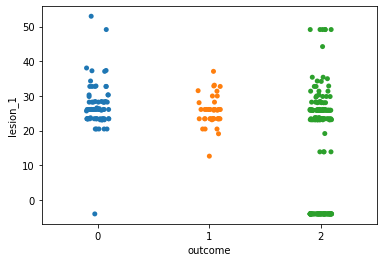

In [143]:
sns.stripplot(y='lesion_1', x='outcome', data=dataset)

In [144]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## lesion_2

In [145]:
dataset['lesion_2'].isna().sum()

0

8.270410921017985


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


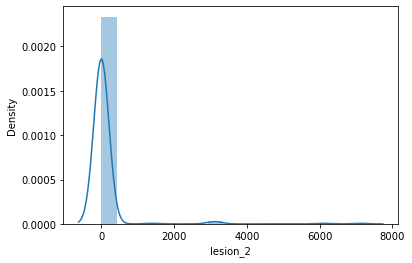

6.313315901829316


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


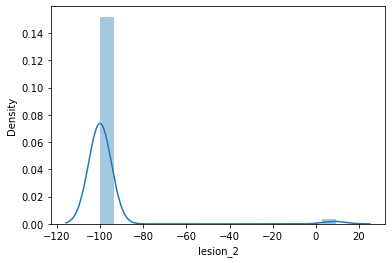

In [146]:
modify_boxcox_value('lesion_2', 0.01)

<AxesSubplot:xlabel='outcome', ylabel='lesion_2'>

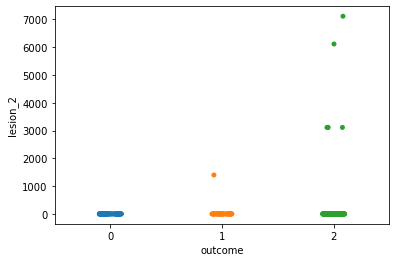

In [147]:
sns.stripplot(y='lesion_2', x='outcome', data=dataset)

## lesion_3

In [148]:
dataset['lesion_3'].isna().sum()

0

17.233687939614057


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


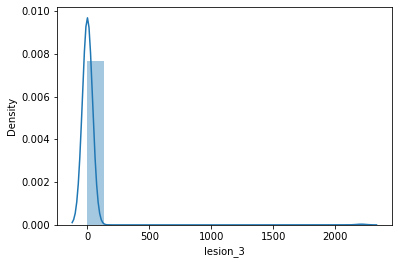

17.233687939614057


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


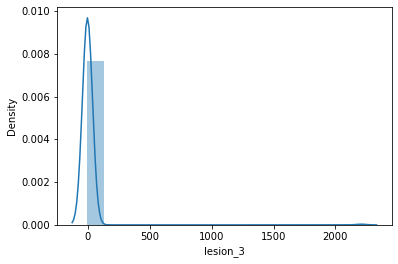

In [149]:
modify_boxcox_value('lesion_3', 1)

<AxesSubplot:xlabel='outcome', ylabel='lesion_3'>

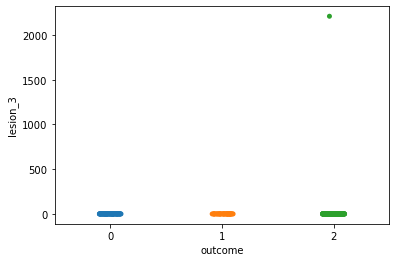

In [150]:
sns.stripplot(y='lesion_3', x='outcome', data=dataset)

## cp_data

In [151]:
dataset['cp_data'].isna().sum()

0

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp_data', ylabel='count'>

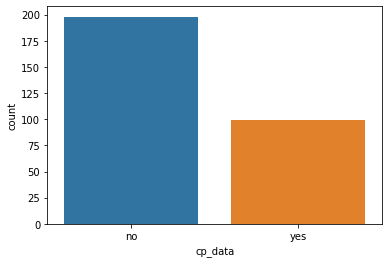

In [152]:
sns.countplot(dataset['cp_data'])

In [153]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

In [154]:
features_for_model = [
       'surgery', 'age', 'rectal_temp', 'transformed_pulse', 
       'transformed_respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
        'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
        'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
        'abdomen', 'packed_cell_volume', 'total_protein', 'surgical_lesion',
        'lesion_1', 'cp_data', 'TreatedMultipleTimes', 'outcome'
]

In [155]:
modelling_dataset = dataset[features_for_model]

modelling_dataset.head()

,surgery,age,rectal_temp,transformed_pulse,transformed_respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,surgical_lesion,lesion_1,cp_data,TreatedMultipleTimes,outcome
0,0,adult,38.5,2.032133,2.432335,cool,reduced,normal_pink,more_3_sec,extreme_pain,...,none,decreased,distend_large,2.900263,0.639283,no,37.241039,no,1,0
1,1,adult,39.2,2.082990,2.253599,cool,normal,pale_cyanotic,less_3_sec,mild_pain,...,none,absent,other,2.959320,0.665816,no,23.419514,no,1,1
2,0,adult,38.3,1.928369,2.351940,normal,normal,pale_pink,less_3_sec,mild_pain,...,none,normal,normal,2.720898,0.628226,no,-4.000000,yes,1,2
3,1,young,39.1,2.174911,2.938828,cold,normal,dark_cyanotic,more_3_sec,depressed,...,less_1_liter,decreased,distend_large,2.936549,0.632159,yes,23.419514,yes,1,0
4,0,adult,37.3,2.109944,2.544407,cool,normal,dark_cyanotic,more_3_sec,mild_pain,...,none,absent,distend_large,3.171049,0.633549,no,28.391205,no,1,0


## Encoding Categorical Data to Numerical

In [156]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in modelling_dataset.select_dtypes(include=['object']).columns.tolist():
    
    dataset[col] = le.fit_transform(dataset[col])

C:\Users\jiten\AppData\Local\Temp/ipykernel_18320/3182135028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])


## Correlation Matrix

In [157]:
dataset.corr()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
surgery,1.000000,0.089255,0.126044,-0.036666,0.174904,0.178555,-0.182394,0.118506,0.043808,0.078021,...,0.010150,-0.183416,0.602053,0.446919,0.098765,0.047192,0.004865,-0.015382,0.174101,0.157576
age,0.089255,1.000000,0.697123,0.178481,0.505028,0.374703,-0.012788,0.030292,-0.169201,-0.036581,...,-0.214290,-0.103116,0.044360,0.040217,0.017510,0.196033,0.078621,-0.101220,0.411767,0.316789
hospital_number,0.126044,0.697123,1.000000,0.131530,0.336443,0.248691,0.002094,0.026227,-0.154936,0.019044,...,-0.272007,-0.107952,0.102173,0.121571,-0.050802,-0.021102,0.095184,-0.056928,0.278429,0.197784
rectal_temp,-0.036666,0.178481,0.131530,1.000000,0.196288,0.230299,-0.046756,0.012822,-0.148632,0.117844,...,-0.022124,0.014233,-0.015499,0.007450,-0.061109,0.028721,0.056904,0.094921,0.199749,0.220309
pulse,0.174904,0.505028,0.336443,0.196288,1.000000,0.433575,-0.276351,0.252236,-0.048830,0.381073,...,-0.142141,-0.337296,0.252430,0.255811,0.000941,0.102339,0.114815,-0.018637,0.958728,0.439550
respiratory_rate,0.178555,0.374703,0.248691,0.230299,0.433575,1.000000,-0.030181,0.129136,-0.084919,0.076722,...,-0.145180,-0.070479,0.201227,0.216727,-0.011237,0.147202,-0.049026,-0.053488,0.400866,0.917317
temp_of_extremities,-0.182394,-0.012788,0.002094,-0.046756,-0.276351,-0.030181,1.000000,-0.202233,-0.098187,-0.251165,...,0.030107,0.286186,-0.218445,-0.186618,0.027221,-0.027325,-0.048797,-0.075852,-0.279131,-0.051373
peripheral_pulse,0.118506,0.030292,0.026227,0.012822,0.252236,0.129136,-0.202233,1.000000,0.070562,0.256476,...,-0.050844,-0.164226,0.168686,0.223877,0.002739,-0.025003,0.072242,0.029015,0.264917,0.163388
mucous_membrane,0.043808,-0.169201,-0.154936,-0.148632,-0.048830,-0.084919,-0.098187,0.070562,1.000000,-0.034304,...,-0.005040,0.061135,0.079097,0.110920,0.029471,0.001190,-0.106158,0.073946,-0.044703,-0.056950
capillary_refill_time,0.078021,-0.036581,0.019044,0.117844,0.381073,0.076722,-0.251165,0.256476,-0.034304,1.000000,...,-0.044292,-0.272201,0.164838,0.187465,0.006037,-0.034688,0.064923,0.221682,0.418795,0.120746


<AxesSubplot:>

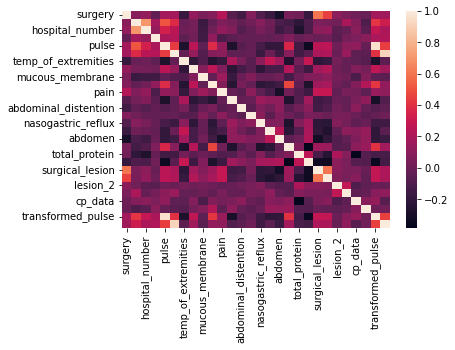

In [158]:
sns.heatmap(dataset.corr())

## Train Test Split Dataset

In [159]:
from sklearn.model_selection import train_test_split   

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('outcome', axis=1), dataset['outcome'], test_size=0.2, random_state=4)

In [160]:
y_train.value_counts()

2    142
0     61
1     34
Name: outcome, dtype: int64

In [161]:
y_test.value_counts()

2    35
0    15
1    10
Name: outcome, dtype: int64

## Train LogisticRegression Model

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
weights = {2:1.0, 0:1.25, 1: 3}

model = LogisticRegression(class_weight=weights, random_state=0, ).fit(X_train, y_train)

## Evaluate the Model

In [164]:
from sklearn.metrics import accuracy_score

accuracy_score(model.predict(X_test), y_test)

0.5833333333333334

## Classification Report 

In [165]:
from sklearn.metrics import classification_report
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      0.33      0.36        12
           2       0.89      0.66      0.76        47

    accuracy                           0.58        60
   macro avg       0.43      0.33      0.37        60
weighted avg       0.77      0.58      0.67        60



## Conclusion

1. Understood importance of EDA. Found interesting patterns of horses getting admitted twice in the hospital because of exploration of Data.
2. Used Logistic Regression to solve Classfication Problem for predicting horse outcome after hospitalization.
3. Utilized Median Encoding Strategy to impute missing data.

### References

1. [EDA](https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,statistical%20summary%20and%20graphical%20representations.)
2. [Hourse Colic Dataset](https://www.kaggle.com/uciml/horse-colic)
3. [Sklearn Python Package](https://scikit-learn.org/stable/index.html)